- import lib and check version

In [4]:
# What version of Python do you have?
import sys

import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf
import seaborn as sns
import math
import matplotlib.pyplot as plt
import numpy as np
import re
import demoji
import pycld2 as cld2
import datetime
from textblob import TextBlob
from textblob.taggers import NLTKTagger

print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

Tensor Flow Version: 1.13.1
Keras Version: 2.2.4-tf

Python 3.6.10 |Anaconda, Inc.| (default, Jan  7 2020, 15:01:53) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
Pandas 1.0.1
Scikit-Learn 0.22.1
GPU is NOT AVAILABLE


- init demoji

In [5]:
demoji.download_codes()

... OK (Got response in 0.33 seconds)
Writing emoji data to /Users/frostace/.demoji/codes.json ...
... OK


- start server service in terminal

In [3]:
# source activate bert_env
# bert-serving-start -model_dir ./model/tmp/english_L-12_H-768_A-12/ -num_worker=1

- start client service

In [9]:
from bert_serving.client import BertClient
bc = BertClient()
# bc.tweet_table(['First do it', 'then do it right', 'then do it better'])

- load acronym dict and emoticon dict

In [41]:
acronym_table = pd.read_csv("./dictionary/acronym_dict.csv")
acronym_dict = dict()
emoticon_table = pd.read_csv("./dictionary/emoticon_dict.csv")
emoticon_dict = dict()

for row in range(acronym_table.shape[0]):
    slang = acronym_table.iloc[row, 0]
    # print("before:", slang)
    slang = re.sub(r'\\', '\\\\', slang)
    # print("after:", slang)
    for ch in ['\.', '\^', '\$', '\*', '\+', '\?', '\|', '\#', '\!', '\"', '\%', 
              "\'", '\,', '\/', '\:', '\;', '\<', '\=', '\>', '\@', "\`"]:
        print(ch, slang)
        slang = re.sub(r'' + ch, r'' + ch, slang)
    acronym_dict[slang] = acronym_table.iloc[row, 1]
    
for row in range(emoticon_table.shape[0]):
    emoticon = emoticon_table.iloc[row, 0]
    emoticon = re.sub(r'\\', '\\\\', emoticon)
    for ch in ['\.', '\^', '\$', '\*', '\+', '\?', '\|', '\#', '\!', '\"', '\%', 
              "\'", '\,', '\/', '\:', '\;', '\<', '\=', '\>', '\@', "\`"]:
        print(ch, emoticon)
        emoticon = re.sub(r'' + ch, ch, emoticon)
    emoticon_dict[emoticon] = emoticon_table.iloc[row, 1]

\. *4u
\^ *4u
\$ *4u
\* *4u
\+ \*4u
\? \*4u
\| \*4u
\# \*4u
\! \*4u
" \*4u
\% \*4u
' \*4u
\, \*4u
\/ \*4u
\: \*4u
\; \*4u
\< \*4u
\= \*4u
\> \*4u
\@ \*4u
\` \*4u
\. *67
\^ *67
\$ *67
\* *67
\+ \*67
\? \*67
\| \*67
\# \*67
\! \*67
" \*67
\% \*67
' \*67
\, \*67
\/ \*67
\: \*67
\; \*67
\< \*67
\= \*67
\> \*67
\@ \*67
\` \*67
\. *eg*
\^ *eg*
\$ *eg*
\* *eg*
\+ \*eg\*
\? \*eg\*
\| \*eg\*
\# \*eg\*
\! \*eg\*
" \*eg\*
\% \*eg\*
' \*eg\*
\, \*eg\*
\/ \*eg\*
\: \*eg\*
\; \*eg\*
\< \*eg\*
\= \*eg\*
\> \*eg\*
\@ \*eg\*
\` \*eg\*
\. 7734
\^ 7734
\$ 7734
\* 7734
\+ 7734
\? 7734
\| 7734
\# 7734
\! 7734
" 7734
\% 7734
' 7734
\, 7734
\/ 7734
\: 7734
\; 7734
\< 7734
\= 7734
\> 7734
\@ 7734
\` 7734
\. 0day
\^ 0day
\$ 0day
\* 0day
\+ 0day
\? 0day
\| 0day
\# 0day
\! 0day
" 0day
\% 0day
' 0day
\, 0day
\/ 0day
\: 0day
\; 0day
\< 0day
\= 0day
\> 0day
\@ 0day
\` 0day
\. 0noe
\^ 0noe
\$ 0noe
\* 0noe
\+ 0noe
\? 0noe
\| 0noe
\# 0noe
\! 0noe
" 0noe
\% 0noe
' 0noe
\, 0noe
\/ 0noe
\: 0noe
\; 0noe
\< 0noe
\= 0noe
\>

- load exclamation dict

In [8]:
s = 'aha, ahem, ahh, ahoy, alas, arg, aw, bam, bingo, blah, boo, bravo, brrr, cheers, congratulations, dang, drat, darn, duh, eek, eh, encore, eureka, fiddlesticks, gadzooks, gee, gee, whiz, golly, goodbye, goodness, good grief, gosh, ha-ha, hallelujah, hello, hey, hmm, holy buckets, holy cow, holy smokes, hot dog, huh, humph, hurray, oh, oh dear, oh my, oh well, oops, ouch, ow, phew, phooey, pooh, rats, shh, shoo, thanks, there, tut-tut, uh-huh, uh-oh, ugh, wahoo, well, whoa, whoops, wow, yeah, yes, yikes, yippee, yo, yuck'
exclamation_dict = set(s.split(', '))
# generate exclamation pattern with the dictionary
exclamation_pattern = r''
for word in exclamation_dict:
    exclamation_pattern += word + '|'
exclamation_pattern = exclamation_pattern[:-1]

In [23]:
re.findall(exclamation_pattern, "OH my god wow".lower())

['oh', 'wow']

- data cleaning function

In [80]:
csv_file = pd.read_csv("./data_tweets/tweets-10000-" + "2019-02-06" +".csv", lineterminator='\n')
raw_tweet = csv_file.tweet.to_list()
df = pd.DataFrame(columns = ['date', 
                             'tweet', 
                             'sentiment_score',
                             'num_hashtags',
                             'num_targets',
                             'num_urls',
                             'num_negations',
                             'num_newlines',
                             'num_pos_exclam',
                             'num_neg_exclam',
                             'num_pos_cap',
                             'num_neg_cap',
                             'num_pos_words',
                             'num_neg_words',
                             'num_JJ',
                             'num_RB',
                             'num_VB',
                             'num_NN',
                             'num_pos_JJ',
                             'num_pos_RB',
                             'num_pos_VB',
                             'num_pos_NN',
                             'num_neg_JJ',
                             'num_neg_RB',
                             'num_neg_VB',
                             'num_neg_NN',
                             'total_score_JJ',
                             'total_score_RB',
                             'total_score_VB',
                             'total_score_NN',
                             ])
df['tweet'] = raw_tweet
df['date'] = csv_file.date.to_list()

In [84]:
# %%time
# # new, i tested, the original way is faster, although it looks more efficient/
# csv_file = pd.read_csv("./data_tweets/tweets-10000-" + "2019-02-06" +".csv", lineterminator='\n')
# raw_tweet = csv_file.tweet.to_list()
# raw_date = csv_file.date.to_list()

# rows_to_drop = []
# # init lists to maintain new features
# '''# sentiment
# sentiment_score = []
# emoticon_score = [] # not available until resolve regex issue

# # twitter
# num_hashtags = []
# num_targets = []
# num_urls = []
# num_negations = []
# num_newlines = []
# num_ext_pos_emo = [] # not available until resolve regex issue
# num_ext_neg_emo = [] # not available until resolve regex issue
# num_pos_emo = [] # not available until resolve regex issue
# num_neg_emo = [] # not available until resolve regex issue
# num_pos_exclam = []
# num_neg_exclam = []
# num_pos_cap = []
# num_neg_cap = []
# num_pos_words = []
# num_neg_words = []

# # POS
# num_JJ = []
# num_RB = []
# num_VB = []
# num_NN = []
# num_pos_JJ = []
# num_pos_RB = []
# num_pos_VB = []
# num_pos_NN = []
# num_neg_JJ = []
# num_neg_RB = []
# num_neg_VB = []
# num_neg_NN = []
# total_score_JJ = []
# total_score_RB = []
# total_score_VB = []
# total_score_NN = []'''

# useful_pos = set(['JJ', 'RB', 'VB', 'NN'])

# for i in range(len(raw_tweet)):
#     line = raw_tweet[i]

#     ### Preprocessing
#     # filter other languages
#     isReliable, textBytesFound, details = cld2.detect(line)
#     if details[0][1] != 'en':
#         rows_to_drop.append(i)
#         continue

#     '''# substitute acronym slangs
#     for slang in acronym_dict:
#         print(slang)
#         line = re.sub(r'' + slang, acronym_dict[slang], line)

#     # remove emoticons and maintain an emoticon sentiment score
#     emoti_score = 0
#     emoti_count = {-2:0, -1:0, 0:0, 1:0, 2:0}
#     for emoti in emoticon_dict:
#         if emoti in line:
#             line = re.sub(r'' + emoti, '', line)
#             emoti_score += emoticon_dict[emoti]
#             # 2.2. # of extremely-pos, extremely-neg, positive, negative emoticons
#             emoti_count[emoticon_dict[emoti]] = emoti_count.get(emoticon_dict[emoti], 0) + 1
#     '''

#     # substitute emoji        
#     # emoji_pattern = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
#     # line = emoji_pattern.sub(r'', line)
#     line = demoji.replace(line)

#     # substitute url with ||U||
#     line = re.sub(r'(http\S+)|((...)*.com(...)*)', "||U||", line)

#     # substitute #hashtag with ||H||
#     line = re.sub(r'\#[a-zA-Z]+', "||H||", line)

#     # substitute @target with ||T||
#     line = re.sub(r'@[a-zA-Z]+', "||T||", line)

#     # substitute negations with NOT
#     for negation in ['not', 'no', 'never', 'n\'t', 'cannot']:
#         line = re.sub(r'' + negation, " NOT ", line)

#     # remove redundant spacing
#     line = re.sub(r'' + ' ' + '{2,}', ' ', line)

#     # substitute repeated sequence with 3 repeated characters
#     for ch in 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ':
#         line = re.sub(r'' + ch + '{3,}', ch + ch + ch, line)

#     # 1. sentiment features
#     line_blob = TextBlob(line)
#     sentiment_score = line_blob.sentiment.polarity
#     # emoticon_score.append(emoti_score)

#     # 2. twitter-specific features
#     # 2.1. # of hashtags, URLs, targets, negations, newlines
#     num_hashtags = line.count("||H||")
#     num_targets = line.count("||T||")
#     num_urls = line.count("||U||")
#     num_negations = line.count("NOT")
#     num_newlines = line.count("\n")

#     # 2.2. # of (+/-) capitalized words, exclamation words
#     cap_word_list = re.findall(r'[A-Z][\'A-Z]+|[A-Z][a-zA-Z]+', line)
#     pos_cap_words_count = 0
#     neg_cap_words_count = 0
#     for word in cap_word_list:
#         word_polar = TextBlob(word).sentiment.polarity
#         if word_polar > 0:
#             pos_cap_words_count += 1
#         elif word_polar < 0:
#             neg_cap_words_count += 1

#     exclam_word_list = re.findall(exclamation_pattern, line.lower())
#     pos_exclam_words_count = 0
#     neg_exclam_words_count = 0
#     for word in exclam_word_list:
#         word_polar = TextBlob(word).sentiment.polarity
#         if word_polar > 0:
#             pos_exclam_words_count += 1
#         elif word_polar < 0:
#             neg_exclam_words_count += 1
#     num_pos_exclam = pos_exclam_words_count
#     num_neg_exclam = neg_exclam_words_count
#     num_pos_cap = pos_cap_words_count
#     num_neg_cap = neg_cap_words_count

#     # 2.3. # of positive words and negative words
#     pos_words_count = 0
#     neg_words_count = 0
#     wordlist = re.sub("[^\w]", " ",  line).split() # substitute all non word characters with space
#     for word in wordlist:
#         word_polar = TextBlob(word).sentiment.polarity
#         if word_polar > 0:
#             pos_words_count += 1
#         elif word_polar < 0:
#             neg_words_count += 1
#     num_pos_words = pos_words_count
#     num_neg_words = neg_words_count

#     # 3. POS features
#     pos_count = {'JJ':0, 'RB':0, 'VB':0, 'NN':0}
#     pos_score = {'JJ':0, 'RB':0, 'VB':0, 'NN':0}
#     pos_polar_count = {'JJ+':0, 'RB+':0, 'VB+':0, 'NN+':0, 'JJ-':0, 'RB-':0, 'VB-':0, 'NN-':0}

#     pos_tuples = line_blob.tags
#     for word, pos_tag in pos_tuples:
#         if pos_tag in useful_pos:
#             word_polar = TextBlob(word).sentiment.polarity
#             if word_polar > 0:
#                 appendix = '+'
#             elif word_polar < 0:
#                 appendix = '-'
#             else:
#                 appendix = ''

#             # 3.1. # of JJ, RB, VB, NN
#             pos_count[pos_tag] = pos_count.get(pos_tag, 0) + 1
#             # 3.2. ∑ prior polarity scores of words for JJ, RB, VB, NN
#             pos_score[pos_tag] = pos_score.get(pos_tag, 0) + word_polar
#             # 3.3. # of (+/-) POS (JJ, RB, VB, NN)
#             pos_polar_count[pos_tag + appendix] = pos_polar_count.get(pos_tag + appendix, 0) + 1
#     num_JJ = pos_count['JJ']
#     num_RB = pos_count['RB']
#     num_VB = pos_count['VB']
#     num_NN = pos_count['NN']
#     num_pos_JJ = pos_polar_count['JJ+']
#     num_pos_RB = pos_polar_count['RB+']
#     num_pos_VB = pos_polar_count['VB+']
#     num_pos_NN = pos_polar_count['NN+']
#     num_neg_JJ = pos_polar_count['JJ-']
#     num_neg_RB = pos_polar_count['RB-']
#     num_neg_VB = pos_polar_count['VB-']
#     num_neg_NN = pos_polar_count['NN-']
#     total_score_JJ = pos_score['JJ']
#     total_score_RB = pos_score['RB']
#     total_score_VB = pos_score['VB']
#     total_score_NN = pos_score['NN']
#     df = pd.DataFrame(columns = ['date', 
#                                  'tweet', 
#                                  'sentiment_score',
#                                  'num_hashtags',
#                                  'num_targets',
#                                  'num_urls',
#                                  'num_negations',
#                                  'num_newlines',
#                                  'num_pos_exclam',
#                                  'num_neg_exclam',
#                                  'num_pos_cap',
#                                  'num_neg_cap',
#                                  'num_pos_words',
#                                  'num_neg_words',
#                                  'num_JJ',
#                                  'num_RB',
#                                  'num_VB',
#                                  'num_NN',
#                                  'num_pos_JJ',
#                                  'num_pos_RB',
#                                  'num_pos_VB',
#                                  'num_pos_NN',
#                                  'num_neg_JJ',
#                                  'num_neg_RB',
#                                  'num_neg_VB',
#                                  'num_neg_NN',
#                                  'total_score_JJ',
#                                  'total_score_RB',
#                                  'total_score_VB',
#                                  'total_score_NN',
#                                  ])

#     new_row = pd.DataFrame([[
#                             raw_date[i],
#                             raw_tweet[i],
#                             sentiment_score,
#                             num_hashtags,
#                             num_targets,
#                             num_urls,
#                             num_negations,
#                             num_newlines,
#                             num_pos_exclam,
#                             num_neg_exclam,
#                             num_pos_cap,
#                             num_neg_cap,
#                             num_pos_words,
#                             num_neg_words,
#                             num_JJ,
#                             num_RB,
#                             num_VB,
#                             num_NN,
#                             num_pos_JJ,
#                             num_pos_RB,
#                             num_pos_VB,
#                             num_pos_NN,
#                             num_neg_JJ,
#                             num_neg_RB,
#                             num_neg_VB,
#                             num_neg_NN,
#                             total_score_JJ,
#                             total_score_RB,
#                             total_score_VB,
#                             total_score_NN,
#                             ]], columns=df.columns)
#     df = pd.concat([df, new_row], ignore_index=True)
# # return df


CPU times: user 5.25 s, sys: 35 ms, total: 5.28 s
Wall time: 5.29 s


In [68]:
def data_cleaning(date_str):
    csv_file = pd.read_csv("./data_tweets/tweets-10000-" + date_str +".csv", lineterminator='\n')
    raw_tweet = csv_file.tweet.to_list()

    rows_to_drop = []
    # init lists to maintain new features
    # sentiment
    sentiment_score = []
    emoticon_score = []

    # twitter
    num_hashtags = []
    num_targets = []
    num_urls = []
    num_negations = []
    num_newlines = []
    num_ext_pos_emo = []
    num_ext_neg_emo = []
    num_pos_emo = []
    num_neg_emo = []
    num_pos_exclam = []
    num_neg_exclam = []
    num_pos_cap = []
    num_neg_cap = []
    num_pos_words = []
    num_neg_words = []

    # POS
    num_JJ = []
    num_RB = []
    num_VB = []
    num_NN = []
    num_pos_JJ = []
    num_pos_RB = []
    num_pos_VB = []
    num_pos_NN = []
    num_neg_JJ = []
    num_neg_RB = []
    num_neg_VB = []
    num_neg_NN = []
    total_score_JJ = []
    total_score_RB = []
    total_score_VB = []
    total_score_NN = []

    useful_pos = set(['JJ', 'RB', 'VB', 'NN'])

    for i in range(len(raw_tweet)):
        line = raw_tweet[i]

        ### Preprocessing
        # remove non utf-8 encoded characters
        line = re.sub(r'[^\x00-\x7f]', r'', str(line))
        
        # substitute all non word characters with space
        line = re.sub("[^\w]", " ",  line)
        
        # filter other languages
        isReliable, textBytesFound, details = cld2.detect(line)
        if details[0][1] != 'en':
            rows_to_drop.append(i)
            continue
        
        line = ' ' + line + ' '
        # substitute acronym slangs
        for slang in acronym_dict:
            # print(slang)
            line = re.sub(r' ' + slang + ' ', ' ' + acronym_dict[slang] + ' ', line)

        # remove emoticons and maintain an emoticon sentiment score
        emoti_score = 0
        emoti_count = {-2:0, -1:0, 0:0, 1:0, 2:0}
        for emoti in emoticon_dict:
            # print(emoti)
            if emoti in line:
                line = re.sub(r' ' + emoti + ' ', '', line)
                emoti_score += emoticon_dict[emoti]
                # 2.2. # of extremely-pos, extremely-neg, positive, negative emoticons
                emoti_count[emoticon_dict[emoti]] = emoti_count.get(emoticon_dict[emoti], 0) + 1
        
        # substitute emoji        
        # emoji_pattern = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
        # line = emoji_pattern.sub(r'', line)
        line = demoji.replace(line)

        # substitute url with ||U||
        line = re.sub(r'(http\S+)|((...)*.com(...)*)', "||U||", line)

        # substitute #hashtag with ||H||
        line = re.sub(r'\#[a-zA-Z]+', "||H||", line)

        # substitute @target with ||T||
        line = re.sub(r'@[a-zA-Z]+', "||T||", line)

        # substitute negations with NOT
        for negation in ['not', 'no', 'never', 'n\'t', 'cannot']:
            line = re.sub(r'' + negation, " NOT ", line)

        # remove redundant spacing
        line = re.sub(r'' + ' ' + '{2,}', ' ', line)

        # substitute repeated sequence with 3 repeated characters
        for ch in 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ':
            line = re.sub(r'' + ch + '{3,}', ch + ch + ch, line)
        
        # generate a clean tweet for BERT to do encoding
        raw_line = raw_tweet[i]
        clean_tweet = re.sub(r'(http\S+)|((...)*.com(...)*)|\#[a-zA-Z]+|@[a-zA-Z]+', "", raw_line)
        clean_tweet = re.sub("[^\w]", " ", clean_tweet)
        clean_tweet = re.sub(r'' + ' {2,}', ' ', clean_tweet)
        if len(clean_tweet) <= 5:
            rows_to_drop.append(i)
            continue
        raw_tweet[i] = clean_tweet
        
        # 1. sentiment features
        line_blob = TextBlob(line)
        sentiment_score.append(line_blob.sentiment.polarity)
        emoticon_score.append(emoti_score)

        # 2. twitter-specific features
        # 2.1. # of hashtags, URLs, targets, negations, newlines
        num_hashtags.append(line.count("||H||"))
        num_targets.append(line.count("||T||"))
        num_urls.append(line.count("||U||"))
        num_negations.append(line.count("NOT"))
        num_newlines.append(line.count("\n"))
        emoticon_score.append(emoti_score)
        num_ext_pos_emo.append(emoti_count[2])
        num_ext_neg_emo.append(emoti_count[-2])
        num_pos_emo.append(emoti_count[1])
        num_neg_emo.append(emoti_count[-1])
        
        # 2.2. # of (+/-) capitalized words, exclamation words
        cap_word_list = re.findall(r'[A-Z][\'A-Z]+|[A-Z][a-zA-Z]+', line)
        pos_cap_words_count = 0
        neg_cap_words_count = 0
        for word in cap_word_list:
            word_polar = TextBlob(word).sentiment.polarity
            if word_polar > 0:
                pos_cap_words_count += 1
            elif word_polar < 0:
                neg_cap_words_count += 1

        exclam_word_list = re.findall(exclamation_pattern, line.lower())
        pos_exclam_words_count = 0
        neg_exclam_words_count = 0
        for word in exclam_word_list:
            word_polar = TextBlob(word).sentiment.polarity
            if word_polar > 0:
                pos_exclam_words_count += 1
            elif word_polar < 0:
                neg_exclam_words_count += 1
        num_pos_exclam.append(pos_exclam_words_count)
        num_neg_exclam.append(neg_exclam_words_count)
        num_pos_cap.append(pos_cap_words_count)
        num_neg_cap.append(neg_cap_words_count)

        # 2.3. # of positive words and negative words
        pos_words_count = 0
        neg_words_count = 0
        wordlist = re.sub("[^\w]", " ",  line).split() # substitute all non word characters with space
        for word in wordlist:
            word_polar = TextBlob(word).sentiment.polarity
            if word_polar > 0:
                pos_words_count += 1
            elif word_polar < 0:
                neg_words_count += 1
        num_pos_words.append(pos_words_count)
        num_neg_words.append(neg_words_count)

        # 3. POS features
        pos_count = {'JJ':0, 'RB':0, 'VB':0, 'NN':0}
        pos_score = {'JJ':0, 'RB':0, 'VB':0, 'NN':0}
        pos_polar_count = {'JJ+':0, 'RB+':0, 'VB+':0, 'NN+':0, 'JJ-':0, 'RB-':0, 'VB-':0, 'NN-':0}

        pos_tuples = line_blob.tags
        for word, pos_tag in pos_tuples:
            if pos_tag in useful_pos:
                word_polar = TextBlob(word).sentiment.polarity
                if word_polar > 0:
                    appendix = '+'
                elif word_polar < 0:
                    appendix = '-'
                else:
                    appendix = ''

                # 3.1. # of JJ, RB, VB, NN
                pos_count[pos_tag] = pos_count.get(pos_tag, 0) + 1
                # 3.2. ∑ prior polarity scores of words for JJ, RB, VB, NN
                pos_score[pos_tag] = pos_score.get(pos_tag, 0) + word_polar
                # 3.3. # of (+/-) POS (JJ, RB, VB, NN)
                pos_polar_count[pos_tag + appendix] = pos_polar_count.get(pos_tag + appendix, 0) + 1
        num_JJ.append(pos_count['JJ'])
        num_RB.append(pos_count['RB'])
        num_VB.append(pos_count['VB'])
        num_NN.append(pos_count['NN'])
        num_pos_JJ.append(pos_polar_count['JJ+'])
        num_pos_RB.append(pos_polar_count['RB+'])
        num_pos_VB.append(pos_polar_count['VB+'])
        num_pos_NN.append(pos_polar_count['NN+'])
        num_neg_JJ.append(pos_polar_count['JJ-'])
        num_neg_RB.append(pos_polar_count['RB-'])
        num_neg_VB.append(pos_polar_count['VB-'])
        num_neg_NN.append(pos_polar_count['NN-'])
        total_score_JJ.append(pos_score['JJ'])
        total_score_RB.append(pos_score['RB'])
        total_score_VB.append(pos_score['VB'])
        total_score_NN.append(pos_score['NN'])


    csv_file['tweet'] = raw_tweet
    csv_file = csv_file.drop(rows_to_drop, axis=0)

    # sentiment features
    csv_file['sentiment'] = sentiment_score
    csv_file['emoti_score'] = emoticon_score

    # twitter-specific features
    csv_file['num_hashtags'] = num_hashtags
    csv_file['num_targets'] = num_targets
    csv_file['num_urls'] = num_urls
    csv_file['num_negations'] = num_negations
    csv_file['num_newlines'] = num_newlines
    csv_file['num_ext_pos_emo'] = num_ext_pos_emo
    csv_file['num_ext_neg_emo'] = num_ext_neg_emo
    csv_file['num_pos_emo'] = num_pos_emo
    csv_file['num_neg_emo'] = num_neg_emo
    csv_file['num_pos_exclam'] = num_pos_exclam
    csv_file['num_neg_exclam'] = num_neg_exclam
    csv_file['num_pos_cap'] = num_pos_cap
    csv_file['num_neg_cap'] = num_neg_cap
    csv_file['num_pos_words'] = num_pos_words
    csv_file['num_neg_words'] = num_neg_words

    # pos features
    csv_file['num_JJ'] = num_JJ
    csv_file['num_RB'] = num_RB
    csv_file['num_VB'] = num_VB
    csv_file['num_NN'] = num_NN
    csv_file['num_pos_JJ'] = num_pos_JJ
    csv_file['num_pos_RB'] = num_pos_RB
    csv_file['num_pos_VB'] = num_pos_VB
    csv_file['num_pos_NN'] = num_pos_NN
    csv_file['num_neg_JJ'] = num_neg_JJ
    csv_file['num_neg_RB'] = num_neg_RB
    csv_file['num_neg_VB'] = num_neg_VB
    csv_file['num_neg_NN'] = num_neg_NN
    csv_file['total_score_JJ'] = total_score_JJ
    csv_file['total_score_RB'] = total_score_RB
    csv_file['total_score_VB'] = total_score_VB
    csv_file['total_score_NN'] = total_score_NN
    
    return csv_file

- convert tweet to vector

In [71]:
# Inclusive on both sides
start_date = datetime.date(2019, 2, 6)
end_date = datetime.date(2020, 2, 6)
time_window = (end_date - start_date).days + 1

for single_date in (start_date + datetime.timedelta(n) for n in range(time_window)): 
    this_date = single_date.strftime("%Y-%m-%d")
    
    sys.stdout.write('\r')
    # the exact output you're looking for:
    sys.stdout.write("BERT Feature Encoding: %s" % (this_date))
    sys.stdout.flush()
    
    # clean data
    tweet_table = data_cleaning(this_date)
    
    # acquire tweet text list and sentiment score list
    tweet_list = tweet_table['tweet'].to_list()
    sentiment_score_list = tweet_table['sentiment'].to_list()
    
    # generate BERT vector
    tweet_vector_matrix = bc.encode(tweet_list)
    tweet_vector_df = pd.DataFrame(tweet_vector_matrix)
    
    # insert sentiment score column
    tweet_vector_df['sentiment'] = sentiment_score_list
    tweet_vector_df['num_hashtags'] = tweet_table['num_hashtags'].to_list()
    tweet_vector_df['num_targets'] = tweet_table['num_targets'].to_list()
    tweet_vector_df['num_urls'] = tweet_table['num_urls'].to_list()
    tweet_vector_df['num_negations'] = tweet_table['num_negations'].to_list()
    tweet_vector_df['num_newlines'] = tweet_table['num_newlines'].to_list()
    tweet_vector_df['num_ext_pos_emo'] = tweet_table['num_ext_pos_emo'].to_list()
    tweet_vector_df['num_ext_neg_emo'] = tweet_table['num_ext_neg_emo'].to_list()
    tweet_vector_df['num_pos_emo'] = tweet_table['num_pos_emo'].to_list()
    tweet_vector_df['num_neg_emo'] = tweet_table['num_neg_emo'].to_list()
    tweet_vector_df['num_pos_exclam'] = tweet_table['num_pos_exclam'].to_list()
    tweet_vector_df['num_neg_exclam'] = tweet_table['num_neg_exclam'].to_list()
    tweet_vector_df['num_pos_cap'] = tweet_table['num_pos_cap'].to_list()
    tweet_vector_df['num_neg_cap'] = tweet_table['num_neg_cap'].to_list()
    tweet_vector_df['num_pos_words'] = tweet_table['num_pos_words'].to_list()
    tweet_vector_df['num_neg_words'] = tweet_table['num_neg_words'].to_list()
    tweet_vector_df['num_JJ'] = tweet_table['num_JJ'].to_list()
    tweet_vector_df['num_RB'] = tweet_table['num_RB'].to_list()
    tweet_vector_df['num_VB'] = tweet_table['num_VB'].to_list()
    tweet_vector_df['num_NN'] = tweet_table['num_NN'].to_list()
    tweet_vector_df['num_pos_JJ'] = tweet_table['num_pos_JJ'].to_list()
    tweet_vector_df['num_pos_RB'] = tweet_table['num_pos_RB'].to_list()
    tweet_vector_df['num_pos_VB'] = tweet_table['num_pos_VB'].to_list()
    tweet_vector_df['num_pos_NN'] = tweet_table['num_pos_NN'].to_list()
    tweet_vector_df['num_neg_JJ'] = tweet_table['num_neg_JJ'].to_list()
    tweet_vector_df['num_neg_RB'] = tweet_table['num_neg_RB'].to_list()
    tweet_vector_df['num_neg_VB'] = tweet_table['num_neg_VB'].to_list()
    tweet_vector_df['num_neg_NN'] = tweet_table['num_neg_NN'].to_list()
    tweet_vector_df['total_score_JJ'] = tweet_table['total_score_JJ'].to_list()
    tweet_vector_df['total_score_RB'] = tweet_table['total_score_RB'].to_list()
    tweet_vector_df['total_score_VB'] = tweet_table['total_score_VB'].to_list()
    tweet_vector_df['total_score_NN'] = tweet_table['total_score_NN'].to_list()
    
    tweet_vector_df.to_csv("./data_vectors/vectors-10000-" + this_date + ".csv", index=False)

BERT Feature Encoding: 2020-02-06

- see original sentiment distribution

In [72]:
# Inclusive on both sides
start_date = datetime.date(2019, 2, 6)
end_date = datetime.date(2020, 2, 6)
time_window = (end_date - start_date).days + 1

sentiment_scores = []
for single_date in (start_date + datetime.timedelta(n) for n in range(time_window)): 
    this_date = single_date.strftime("%Y-%m-%d")
    
    vector_table = pd.read_csv("./data_vectors/vectors-10000-" + this_date +".csv", lineterminator='\n')
    sentiment_scores += vector_table.sentiment.to_list()

In [73]:
import matplotlib.pyplot as plt

(array([   29.,   116.,   420.,   981.,  3742., 15417., 11517.,  2943.,
          550.,   283.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

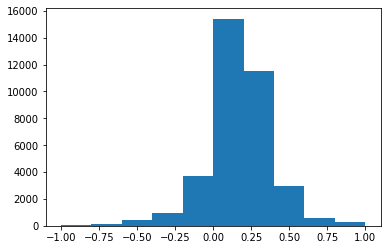

In [74]:
plt.hist(sentiment_scores)